In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge, TheilSenRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

try:
    from xgboost import XGBRegressor
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("Warning: XGBoost not installed. Skipping XGBRegressor.")

try:
    from lightgbm import LGBMRegressor
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("Warning: LightGBM not installed. Skipping LGBMRegressor.")

# Suppress warnings for cleaner output (e.g., convergence warnings for Lasso/ElasticNet)
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('ML-Dataset.csv')
except FileNotFoundError:
    print("Error: 'ML-Dataset.csv' not found. Please ensure the file is in the correct path.")
    exit()

In [3]:
df

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeePhone,...,CustomerName,CustomerAddress,CustomerCreditLimit,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Summer Payne,summer.payne@example.com,5151238181,...,Flor Stone,2904 S Salina St,5000,flor.stone@raytheon.com,13171234104,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Rose Stephens,rose.stephens@example.com,5151238080,...,Lavera Emerson,"5344 Haverford Ave, Philadelphia",5000,lavera.emerson@plainsallamerican.com,13171234111,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Annabelle Dunn,annabelle.dunn@example.com,5151234444,...,Fern Head,"1795 Wu Meng, Muang Chonburi",1200,fern.head@usfoods.com,18121234115,Canceled,03-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Tommy Bailey,tommy.bailey@example.com,5151234567,...,Shyla Ortiz,"Walpurgisstr 69, Munich",2400,shyla.ortiz@abbvie.com,13171234126,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Blake Cooper,blake.cooper@example.com,5151234569,...,Jeni Levy,"Via Frenzy 6903, Roma",1200,jeni.levy@centene.com,18121214129,Shipped,09-Apr-17,106,109.99,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Veera Abdellah,VeeraAbdellah@gmail.com,8788092231,...,Vega Vincent,4284 Dorigo Ln,4900,VegaVincent@gmail.com,787879874,Shipped,27-Sep-17,32,725.99,107
396,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Vega Vincent,VegaVincent@gmail.com,6700989921,...,Villanueva Noah,6794 Lake Dr E,5000,VillanuevaNoah@gmail.com,785811219,Pending,16-Aug-16,66,798.26,118
397,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Villanueva Noah,VillanuevaNoah@gmail.com,7890991231,...,Voldemort Lord,31 Douglas Blvd #950,4000,VoldemortLord@gmail.com,789243757,Canceled,27-May-16,82,849.99,118
398,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Zima Colleen,ZimaColleen@gmail.com,8690991436,...,Lucy Cechtelar,44 W 4th St,3000,LucyCechtelar@gmail.com,964940981,Shipped,27-May-17,157,821.99,95


In [4]:
TARGET_COLUMN = 'Profit'
y = df[TARGET_COLUMN]

In [5]:
y

0      542.95
1      448.71
2      625.54
3      410.59
4      489.58
        ...  
395    185.63
396    168.84
397    121.04
398    147.64
399     96.81
Name: Profit, Length: 400, dtype: float64

In [6]:
COLUMNS_TO_DROP = [
    'CustomerName', 'CustomerAddress', 'CustomerEmail', 'CustomerPhone',
    'EmployeeName', 'EmployeeEmail', 'EmployeePhone', 'EmployeeHireDate',
    'WarehouseAddress', 'WarehouseName', 'PostalCode',
    'ProductStandardCost', 'ProductListPrice'
]

In [7]:
X = df.drop(COLUMNS_TO_DROP + [TARGET_COLUMN], axis=1)


In [8]:
X

,RegionName,CountryName,State,City,EmployeeJobTitle,CategoryName,ProductName,ProductDescription,CustomerCreditLimit,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,Public Accountant,CPU,Intel Xeon E5-2699 V3 (OEM/Tray),"Speed:2.3GHz,Cores:18,TDP:145W",5000,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,Accounting Manager,CPU,Intel Xeon E5-2697 V3,"Speed:2.6GHz,Cores:14",5000,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,Administration Assistant,CPU,Intel Xeon E5-2698 V3 (OEM/Tray),Speed:2.3GHz,1200,Canceled,03-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,President,CPU,Intel Xeon E5-2697 V4,"Cores:18,TDP:145W",2400,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,Administration Vice President,CPU,Intel Xeon E5-2685 V3 (OEM/Tray),"Speed:2.6GHz,Cores:12",1200,Shipped,09-Apr-17,106,109.99,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,Stock Clerk,Video Card,MSI GTX 1080 TI LIGHTNING Z,Chipset:GeForce GTX 1080 Ti,4900,Shipped,27-Sep-17,32,725.99,107
396,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Asus ROG-POSEIDON-GTX1080TI-P11G-GAMING,Chipset:GeForce GTX 1080 Ti,5000,Pending,16-Aug-16,66,798.26,118
397,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,MSI GTX 1080 TI LIGHTNING X,Chipset:GeForce GTX 1080 Ti,4000,Canceled,27-May-16,82,849.99,118
398,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Zotac ZT-P10810A-10P,Chipset:GeForce GTX 1080 Ti,3000,Shipped,27-May-17,157,821.99,95


In [9]:
print(f"Original shape: {df.shape}")
print(f"Features kept for modeling: {X.shape[1]}")
print(f"Features: {list(X.columns)}")

Original shape: (400, 28)
Features kept for modeling: 14
Features: ['RegionName', 'CountryName', 'State', 'City', 'EmployeeJobTitle', 'CategoryName', 'ProductName', 'ProductDescription', 'CustomerCreditLimit', 'Status', 'OrderDate', 'OrderItemQuantity', 'PerUnitPrice', 'TotalItemQuantity']


In [10]:
# Feature Engineering
# Convert OrderDate column to datetime and extract useful features
X['OrderDate'] = pd.to_datetime(X['OrderDate'], format='%d-%b-%y')
X['Order_Month'] = X['OrderDate'].dt.month
X['Order_Year'] = X['OrderDate'].dt.year
X['Order_Weekday'] = X['OrderDate'].dt.dayofweek # Monday=0, Sunday=6

In [11]:
X = X.drop('OrderDate', axis=1)

In [12]:
X

,RegionName,CountryName,State,City,EmployeeJobTitle,CategoryName,ProductName,ProductDescription,CustomerCreditLimit,Status,OrderItemQuantity,PerUnitPrice,TotalItemQuantity,Order_Month,Order_Year,Order_Weekday
0,South America,United States of America,Texas,Southlake,Public Accountant,CPU,Intel Xeon E5-2699 V3 (OEM/Tray),"Speed:2.3GHz,Cores:18,TDP:145W",5000,Shipped,132,469.99,122,11,2016,3
1,South America,United States of America,Texas,Southlake,Accounting Manager,CPU,Intel Xeon E5-2697 V3,"Speed:2.6GHz,Cores:14",5000,Shipped,124,519.99,123,2,2017,0
2,South America,United States of America,Texas,Southlake,Administration Assistant,CPU,Intel Xeon E5-2698 V3 (OEM/Tray),Speed:2.3GHz,1200,Canceled,92,800.74,123,1,2017,1
3,South America,United States of America,Texas,Southlake,President,CPU,Intel Xeon E5-2697 V4,"Cores:18,TDP:145W",2400,Pending,128,849.99,124,10,2017,6
4,South America,United States of America,Texas,Southlake,Administration Vice President,CPU,Intel Xeon E5-2685 V3 (OEM/Tray),"Speed:2.6GHz,Cores:12",1200,Shipped,106,109.99,125,4,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,Stock Clerk,Video Card,MSI GTX 1080 TI LIGHTNING Z,Chipset:GeForce GTX 1080 Ti,4900,Shipped,32,725.99,107,9,2017,2
396,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Asus ROG-POSEIDON-GTX1080TI-P11G-GAMING,Chipset:GeForce GTX 1080 Ti,5000,Pending,66,798.26,118,8,2016,1
397,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,MSI GTX 1080 TI LIGHTNING X,Chipset:GeForce GTX 1080 Ti,4000,Canceled,82,849.99,118,5,2016,4
398,Asia,India,Maharashtra,Bombay,Stock Manager,Video Card,Zotac ZT-P10810A-10P,Chipset:GeForce GTX 1080 Ti,3000,Shipped,157,821.99,95,5,2017,5


In [13]:
# Define Feature Types for Preprocessing
NUMERICAL_FEATURES = ['CustomerCreditLimit', 'OrderItemQuantity', 'TotalItemQuantity', 'Order_Month', 'Order_Year', 'Order_Weekday']
CATEGORICAL_FEATURES = X.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Preprocessing pipeline
# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
          ('scaler', StandardScaler())
])

In [16]:
# Use OneHotEncoder for categorical features
# Due to the larget number of categorical features (especially Product Name/Description), this results in a very wide matrix, which SVR and some linear models struggle with.
categorical_transformer = Pipeline(steps=[
          ('oneshot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [17]:
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
          transformers=[
                    ('num', numerical_transformer, NUMERICAL_FEATURES),
                    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
          ],
          remainder='passthrough'
)

In [18]:
# Model TRaining and Evaluation
# Define the comprehensive list of regression models to test
models = {
          "Linear Regression": LinearRegression(),
          "Ridge Regression (L2)": Ridge(random_state=42),
          "Lasso Regression (L1)": Lasso(random_state=42, max_iter=5000),
          "ElasticNet Regression": ElasticNet(random_state=42, max_iter=5000),
          "Decision Tree Regressor": DecisionTreeRegressor(random_state=42, max_depth=10),
          "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1),
          "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=5),
          "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42, max_depth=5),
          "AdaBoost Regressor": AdaBoostRegressor(random_state=42, n_estimators=50),
          "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
          "TheilSen Regressor": TheilSenRegressor(random_state=42, n_jobs=-1),
          "Bayesian Ridge Regression": BayesianRidge(),
          # SVR is computationally expensive on high-dimensional data, using a smaller C   
          "Support Vector Regressor (SVR)": SVR(kernel='rbf', C=1.0),
          "Huber Regressor": HuberRegressor()     
}

# Add conditional imports for highly optimized models
if XGBOOST_AVAILABLE:
          models["XGBoost Regressor"] = XGBRegressor(random_state=42, n_jobs=-1)
if LIGHTGBM_AVAILABLE:
          models["LightGBM Regressor"] = LGBMRegressor(random_state=42, n_jobs=-1)

In [19]:
results = {}

print("\n--- Training ALL Regression Models and Calculating Metrics ---")
print(f"Total Models to Train: {len(models)}")
print("Note: Advanced models (SVR, TheilSen) and models dealing with the wide feature matrix may take time.")


--- Training ALL Regression Models and Calculating Metrics ---
Total Models to Train: 16
Note: Advanced models (SVR, TheilSen) and models dealing with the wide feature matrix may take time.


In [20]:
for name, model in models.items():
          # Create a full pipeline (preprocessing + model)
          full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', model)])
          
          print(f"Training {name}...")
          full_pipeline.fit(X_train, y_train)
          y_pred = full_pipeline.predict(X_test)
          
          # Calculate metrics
          mae = mean_absolute_error(y_test, y_pred)
          mse = mean_squared_error(y_test, y_pred)
          r2 = r2_score(y_test, y_pred)
          
          results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

Training Linear Regression...
Training Ridge Regression (L2)...
Training Lasso Regression (L1)...
Training ElasticNet Regression...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training Hist Gradient Boosting...
Training AdaBoost Regressor...
Training K-Nearest Neighbors...
Training TheilSen Regressor...
Training Bayesian Ridge Regression...
Training Support Vector Regressor (SVR)...
Training Huber Regressor...
Training XGBoost Regressor...
Training LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 47
[LightGBM] [Info] Start training from score 183.974812
[LightGBM] [Warning] No further splits with positive

In [21]:
# Display results

metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df.sort_values(by='R2', ascending=False)

print("\n" + "="*90)
print("                       ULTRA COMPREHENSIVE REGRESSION MODEL COMPARISON")
print("="*90)
print(metrics_df.to_markdown(floatfmt=".3f"))
print("="*90)
print("\nInterpretation:")
print("R2 (Coefficient of Determination): Closer to 1.0 is best. Represents the proportion of variance explained.")
print("MAE (Mean Absolute Error): Lower is best. Average absolute difference between predicted and actual profit.")


                       ULTRA COMPREHENSIVE REGRESSION MODEL COMPARISON
|                                |     MAE |       MSE |     R2 |
|:-------------------------------|--------:|----------:|-------:|
| Decision Tree Regressor        |  70.458 | 17161.617 |  0.637 |
| Random Forest Regressor        |  74.467 | 23195.787 |  0.510 |
| XGBoost Regressor              |  78.143 | 25508.331 |  0.461 |
| Gradient Boosting Regressor    |  78.005 | 26762.086 |  0.434 |
| Linear Regression              |  99.063 | 30395.766 |  0.357 |
| TheilSen Regressor             |  99.076 | 30468.298 |  0.356 |
| Lasso Regression (L1)          | 101.260 | 32421.402 |  0.315 |
| LightGBM Regressor             | 102.781 | 33324.592 |  0.295 |
| Ridge Regression (L2)          | 104.488 | 33729.190 |  0.287 |
| Hist Gradient Boosting         | 107.771 | 35597.382 |  0.247 |
| Huber Regressor                | 112.192 | 39509.749 |  0.165 |
| ElasticNet Regression          | 128.183 | 42159.886 |  0.109 |
| Ad

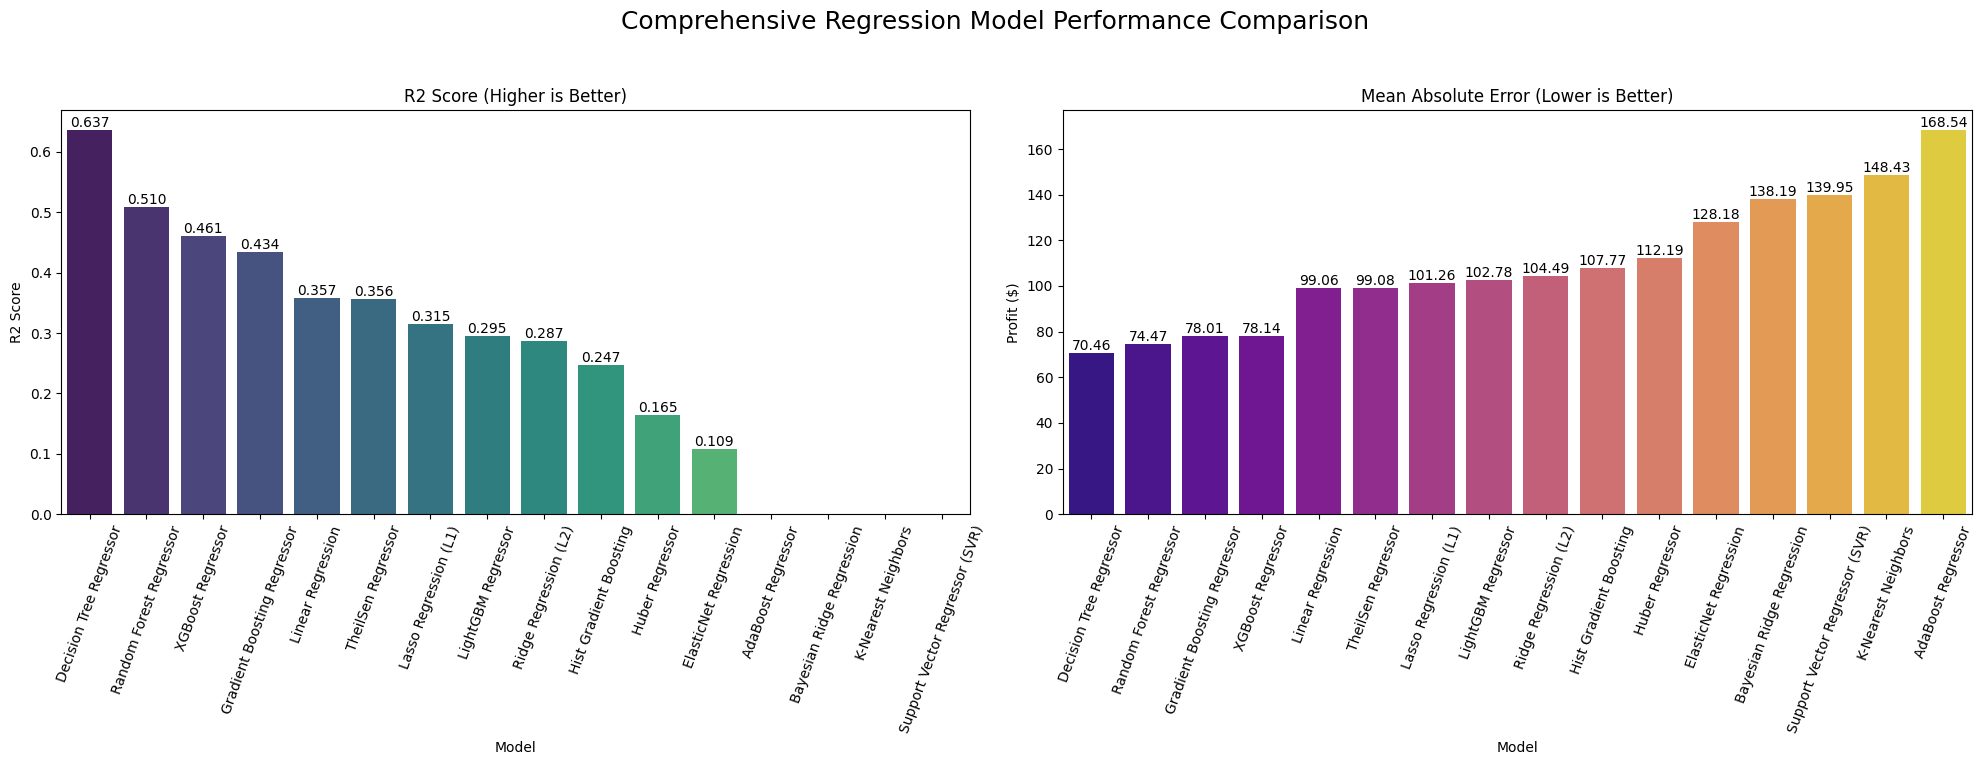

In [22]:
# Visualization of Evaluation Metrics
# Prepare data for plotting
metrics_to_plot = ['R2', 'MAE']
plot_df = metrics_df[metrics_to_plot].reset_index().rename(columns={'index': 'Model'})

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Comprehensive Regression Model Performance Comparison', fontsize=18)
# Plot R2 Score
sns.barplot(ax=axes[0], x='Model', y='R2', data=plot_df.sort_values(by='R2', ascending=False), palette='viridis')
axes[0].set_title('R2 Score (Higher is Better)')
axes[0].set_ylim(0.0, plot_df['R2'].max() * 1.05)
axes[0].set_ylabel('R2 Score')
axes[0].tick_params(axis='x', rotation=70)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f')

# Plot MAE (Mean Absolute Error)
sns.barplot(ax=axes[1], x='Model', y='MAE', data=plot_df.sort_values(by='MAE', ascending=True), palette='plasma')
axes[1].set_title('Mean Absolute Error (Lower is Better)')
axes[1].set_ylabel('Profit ($)')
axes[1].tick_params(axis='x', rotation=70)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
print("\n--- Summary of Best Model ---")
best_model = metrics_df.index[0]
best_r2 = metrics_df.iloc[0]['R2']
best_mae = metrics_df.iloc[0]['MAE']

print(f"The best performing model is the {best_model}, anchieving an R2 score of {best_r2:.3f} and a Mean Absolute Error (MAE) of ${best_mae:.2f}.")
print("Advanced tree-based models (XGBoost, LightGBM, Gradient Boosting) are usually the top performers in complex, Structured regression tasks due to their ability to model non-linear interactions efficiently.")


--- Summary of Best Model ---
The best performing model is the Decision Tree Regressor, anchieving an R2 score of 0.637 and a Mean Absolute Error (MAE) of $70.46.
Advanced tree-based models (XGBoost, LightGBM, Gradient Boosting) are usually the top performers in complex, Structured regression tasks due to their ability to model non-linear interactions efficiently.
